In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
X = titanic[['sex','age','fare','class','embark_town','alone']].copy()
X.shape

(891, 6)

In [5]:
X.head()

,sex,age,fare,class,embark_town,alone
0,male,22.0,7.2500,Third,Southampton,False
1,female,38.0,71.2833,First,Cherbourg,False
2,female,26.0,7.9250,Third,Southampton,True
3,female,35.0,53.1000,First,Southampton,False
4,male,35.0,8.0500,Third,Southampton,True


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          714 non-null    float64 
 2   fare         891 non-null    float64 
 3   class        891 non-null    category
 4   embark_town  889 non-null    object  
 5   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), object(2)
memory usage: 29.8+ KB


In [7]:
X.isna().sum()

sex              0
age            177
fare             0
class            0
embark_town      2
alone            0
dtype: int64

In [8]:
X.embark_town.value_counts(dropna=False, normalize=True)

Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64

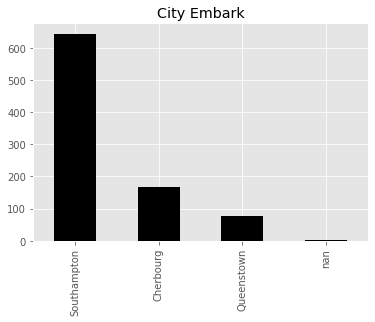

In [9]:
X.embark_town.value_counts(dropna=False).plot(
    kind='bar',
    color='k',
    title='City Embark'
)

In [10]:
X.dropna(subset=['embark_town'], inplace=True)
X.isna().sum()

sex              0
age            177
fare             0
class            0
embark_town      0
alone            0
dtype: int64

In [11]:
X.age.isna().sum() / X.shape[0] * 100

19.910011248593925

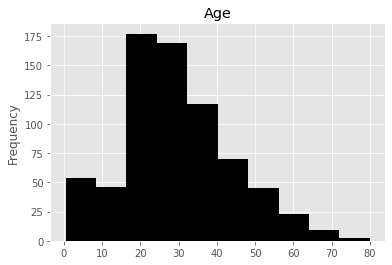

In [12]:
X['age'].plot(
    kind='hist',
    color='k',
    title='Age'
)

In [13]:
mean = round(X.age.mean())
mean

30

In [14]:
X = titanic[['sex','age','fare','class','embark_town','alone']].copy()

In [15]:
age_min = X.age.mean() - (3 * X.age.std())
age_max = X.age.mean() + (3 * X.age.std())

age_min, age_max

(-13.88037434994331, 73.27860964406095)

In [16]:
X.shape

(891, 6)

In [17]:
# X = X[X.age <= age_max]
# X.shape

In [18]:
# 1 - (712 / 889)

In [19]:
X.age.fillna(round(X.age.mean()), inplace=True)
X.isna().sum()

sex            0
age            0
fare           0
class          0
embark_town    2
alone          0
dtype: int64

In [20]:
cat_features = X.select_dtypes(exclude='number').columns.tolist()
cat_features

['sex', 'class', 'embark_town', 'alone']

In [21]:
num_features = X.select_dtypes(include='number').columns.tolist()
num_features

['age', 'fare']

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for cat in cat_features:
  X[cat] = encoder.fit_transform(X[cat])
  
X.head()

,sex,age,fare,class,embark_town,alone
0,1,22.0,7.2500,2,2,0
1,0,38.0,71.2833,0,0,0
2,0,26.0,7.9250,2,2,1
3,0,35.0,53.1000,0,2,0
4,1,35.0,8.0500,2,2,1


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_features]= scaler.fit_transform(X[num_features])

X.head()

,sex,age,fare,class,embark_town,alone
0,1,-0.597055,-0.502445,2,2,0
1,0,0.634162,0.786845,0,0,0
2,0,-0.289251,-0.488854,2,2,1
3,0,0.403309,0.420730,0,2,0
4,1,0.403309,-0.486337,2,2,1
